In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [21]:
df.shape

(3554, 18)

In [22]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,smart world orchard,sector 61,2.60,14723.0,3,3,2,2.0,New Property,1766.0,0,0,0,0,0,0,47
1,flat,pioneer park,sector 61,2.10,11667.0,3,3,3,15.0,Relatively New,1592.0,0,0,0,0,0,2,49
2,flat,godrej air,sector 85,2.60,12212.0,3,3,3,17.0,Under Construction,2129.0,0,1,0,0,0,0,44
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,2,2,3,1.0,Relatively New,1222.0,1,0,0,0,0,0,43
4,flat,central park flower valley,sector 33,1.35,10385.0,3,2,2,3.0,New Property,1444.0,0,0,0,0,0,0,87


In [23]:
train_df = df.drop(columns=['society','price_per_sqft'])

- As price_per_sqft is Highly correlated with price column
- It is not logical if we use society and price_per_sqft as a input

## Goal: To find best suitable features that can be used to predict price

### luxury_score

- As user dont have any idea about luxury score, so we will convert it into a categorical featue so that user can properly interpretate it
- 3 Category: Budget, Semi-luxury, luxury

In [28]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 61,2.60,3,3,2,2.0,New Property,1766.0,0,0,0,0,0,0,47
1,flat,sector 61,2.10,3,3,3,15.0,Relatively New,1592.0,0,0,0,0,0,2,49
2,flat,sector 85,2.60,3,3,3,17.0,Under Construction,2129.0,0,1,0,0,0,0,44
3,flat,sector 70,1.23,2,2,3,1.0,Relatively New,1222.0,1,0,0,0,0,0,43
4,flat,sector 33,1.35,3,2,2,3.0,New Property,1444.0,0,0,0,0,0,0,87


<Axes: ylabel='luxury_score'>

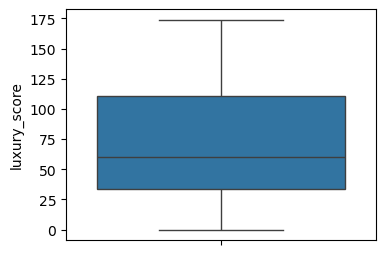

In [29]:
plt.figure(figsize=(4,3))
sns.boxplot(df['luxury_score'])

In [30]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [31]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [32]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 61,2.60,3,3,2,2.0,New Property,1766.0,0,0,0,0,0,0,47,Low
1,flat,sector 61,2.10,3,3,3,15.0,Relatively New,1592.0,0,0,0,0,0,2,49,Low
2,flat,sector 85,2.60,3,3,3,17.0,Under Construction,2129.0,0,1,0,0,0,0,44,Low
3,flat,sector 70,1.23,2,2,3,1.0,Relatively New,1222.0,1,0,0,0,0,0,43,Low
4,flat,sector 33,1.35,3,2,2,3.0,New Property,1444.0,0,0,0,0,0,0,87,Medium


## floorNum

- As we will not ask user about a specific floor he is interested in.
- Rather than we will convert it into a categories like low,mid,high

<Axes: xlabel='floorNum'>

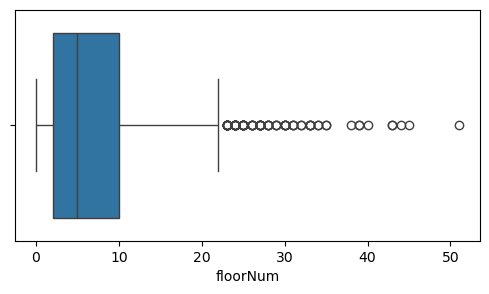

In [35]:
plt.figure(figsize=(6,3))
sns.boxplot(df['floorNum'],orient='h')

In [36]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [37]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [38]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 61,2.60,3,3,2,2.0,New Property,1766.0,0,0,0,0,0,0,47,Low,Low Floor
1,flat,sector 61,2.10,3,3,3,15.0,Relatively New,1592.0,0,0,0,0,0,2,49,Low,High Floor
2,flat,sector 85,2.60,3,3,3,17.0,Under Construction,2129.0,0,1,0,0,0,0,44,Low,High Floor
3,flat,sector 70,1.23,2,2,3,1.0,Relatively New,1222.0,1,0,0,0,0,0,43,Low,Low Floor
4,flat,sector 33,1.35,3,2,2,3.0,New Property,1444.0,0,0,0,0,0,0,87,Medium,Mid Floor


In [39]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [40]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 61,2.60,3,3,2,New Property,1766.0,0,0,0,0,0,0,Low,Low Floor
1,flat,sector 61,2.10,3,3,3,Relatively New,1592.0,0,0,0,0,0,2,Low,High Floor
2,flat,sector 85,2.60,3,3,3,Under Construction,2129.0,0,1,0,0,0,0,Low,High Floor
3,flat,sector 70,1.23,2,2,3,Relatively New,1222.0,1,0,0,0,0,0,Low,Low Floor
4,flat,sector 33,1.35,3,2,2,New Property,1444.0,0,0,0,0,0,0,Medium,Mid Floor


In [41]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 10', 'sector 102',
       'sector 103', 'sector 104', 'sector 105', 'sector 106',
       'sector 107', 'sector 108', 'sector 109', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 2', 'sector 21', 'sector 22', 'sector 23', 'sector 24',
       'sector 25', 'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector 59', 'sector 6',
       'se

In [42]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,65.0,3,3,2.0,1.0,1766.0,0,0,0,0,0,0,1.0,1.0
1,0.0,65.0,3,3,3.0,3.0,1592.0,0,0,0,0,0,2,1.0,0.0
2,0.0,89.0,3,3,3.0,4.0,2129.0,0,1,0,0,0,0,1.0,0.0
3,0.0,74.0,2,2,3.0,3.0,1222.0,1,0,0,0,0,0,1.0,1.0
4,0.0,38.0,3,2,2.0,1.0,1444.0,0,0,0,0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,72.0,3,3,2.0,3.0,1510.0,0,0,0,0,0,0,0.0,1.0
3550,1.0,38.0,5,7,4.0,4.0,4071.0,1,1,1,1,0,0,2.0,1.0
3551,0.0,7.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
3552,0.0,60.0,3,3,3.0,0.0,2036.0,0,0,0,0,0,0,2.0,2.0


In [43]:
y_label

0       2.60
1       2.10
2       2.60
3       1.23
4       1.35
        ... 
3549    1.68
3550    9.50
3551    0.48
3552    2.50
3553    1.60
Name: price, Length: 3554, dtype: float64

## Technique 1 - Correlation Analysis


<Axes: >

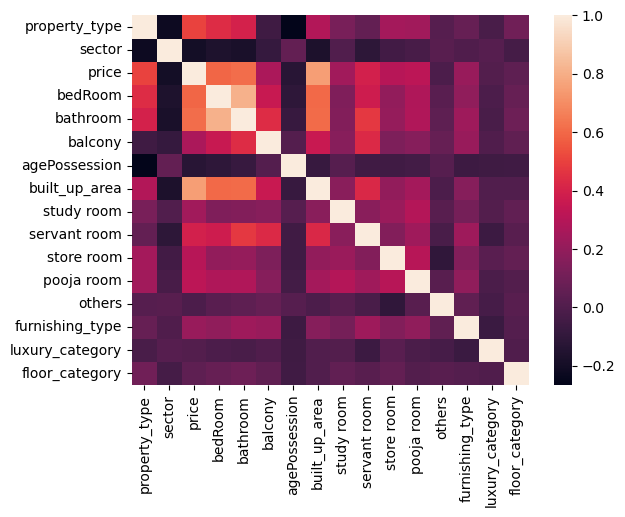

In [45]:
sns.heatmap(data_label_encoded.corr())

In [46]:
## Correlation of all features with price column
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.200093
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.129511
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


## Technique 2 - Random Forest Feature Importance

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.654001
1,sector,0.102271
0,property_type,0.097846
2,bedRoom,0.026724
3,bathroom,0.023239
8,servant room,0.018428
5,agePossession,0.015137
4,balcony,0.012875
9,store room,0.009493
7,study room,0.009042


## Technique 3 - Gradient Boosting Feature importances

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.684411
1,sector,0.101923
0,property_type,0.100339
3,bathroom,0.035899
2,bedRoom,0.032488
8,servant room,0.023506
9,store room,0.009483
5,agePossession,0.003999
7,study room,0.003661
12,furnishing_type,0.001738


## Technique 4 - Permutation Importance


In [52]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.826517
0,property_type,0.166798
1,sector,0.139426
2,bedRoom,0.015566
8,servant room,0.013027
4,balcony,0.007496
3,bathroom,0.004495
12,furnishing_type,0.004227
14,floor_category,0.003151
9,store room,0.003023


## Technique 5 - LASSO

In [54]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.511109
0,property_type,0.712533
3,bathroom,0.277881
9,store room,0.198877
7,study room,0.176026
8,servant room,0.168359
12,furnishing_type,0.139621
10,pooja room,0.074909
13,luxury_category,0.051401
2,bedRoom,0.018856


## Technique 6 - RFE(Recursive feature elimination)

In [56]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.650232
0,property_type,0.101956
1,sector,0.101447
2,bedRoom,0.027708
3,bathroom,0.025347
8,servant room,0.018450
5,agePossession,0.014576
4,balcony,0.012694
9,store room,0.009338
13,luxury_category,0.007637


## Technique 7 - Linear Regression Weights

In [58]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.513728
0,property_type,0.714682
3,bathroom,0.283644
9,store room,0.203054
7,study room,0.183815
8,servant room,0.178343
12,furnishing_type,0.149615
10,pooja room,0.077699
13,luxury_category,0.063259
2,bedRoom,0.022107


## Technique 8 - SHAP

In [60]:
!pip install shap

In [61]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.20001621,  0.64976713, -0.01504246, ...,  0.01264246,
         0.01282424, -0.01334406],
       [-0.18205136,  0.61692041, -0.01484618, ..., -0.01026282,
         0.00757667,  0.03259413],
       [-0.32638633, -0.41449716, -0.0183041 , ..., -0.01300045,
         0.00659906,  0.04611554],
       ...,
       [-0.17561747, -0.08621245, -0.05311072, ..., -0.00583169,
         0.03714424, -0.0034056 ],
       [-0.33108854,  0.40236054, -0.01742442, ..., -0.00111207,
        -0.01366916, -0.03255343],
       [-0.17578386,  0.56282686, -0.04782636, ..., -0.00123572,
         0.00296905, -0.01242465]])

In [62]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.250372
0,property_type,0.465192
1,sector,0.386066
3,bathroom,0.111364
8,servant room,0.094539
2,bedRoom,0.057159
4,balcony,0.042741
5,agePossession,0.029058
14,floor_category,0.023136
12,furnishing_type,0.020931


In [63]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [64]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200093,0.102271,0.101923,0.139426,-0.053046,0.101447,-0.062045,0.386066
bedRoom,0.591289,0.026724,0.032488,0.015566,0.018856,0.027708,0.022107,0.057159
bathroom,0.609777,0.023239,0.035899,0.004495,0.277881,0.025347,0.283644,0.111364
balcony,0.269637,0.012875,0.001251,0.007496,-0.045474,0.012694,-0.068483,0.042741
agePossession,-0.129511,0.015137,0.003999,-0.000710,0.000000,0.014576,0.009160,0.029058
built_up_area,0.748574,0.654001,0.684411,0.826517,1.511109,0.650232,1.513728,1.250372
study room,0.242955,0.009042,0.003661,0.001637,0.176026,0.007113,0.183815,0.019289
servant room,0.391930,0.018428,0.023506,0.013027,0.168359,0.018450,0.178343,0.094539
store room,0.305677,0.009493,0.009483,0.003023,0.198877,0.009338,0.203054,0.018857


In [65]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [66]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.724092
sector             0.132287
bathroom           0.030323
bedRoom            0.027849
servant room       0.025031
balcony            0.011524
agePossession      0.010133
store room         0.008692
study room         0.006571
furnishing_type    0.006485
floor_category     0.005708
luxury_category    0.004918
pooja room         0.004104
others             0.002284
dtype: float64

In [67]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,65.0,3,3,2.0,1.0,1766.0,0,0,0,0,0,0,1.0,1.0
1,0.0,65.0,3,3,3.0,3.0,1592.0,0,0,0,0,0,2,1.0,0.0
2,0.0,89.0,3,3,3.0,4.0,2129.0,0,1,0,0,0,0,1.0,0.0
3,0.0,74.0,2,2,3.0,3.0,1222.0,1,0,0,0,0,0,1.0,1.0
4,0.0,38.0,3,2,2.0,1.0,1444.0,0,0,0,0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,72.0,3,3,2.0,3.0,1510.0,0,0,0,0,0,0,0.0,1.0
3550,1.0,38.0,5,7,4.0,4.0,4071.0,1,1,1,1,0,0,2.0,1.0
3551,0.0,7.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
3552,0.0,60.0,3,3,3.0,0.0,2036.0,0,0,0,0,0,0,2.0,2.0


In [68]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [69]:
scores.mean()

0.8061353219615149

In [70]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [71]:
scores.mean()

0.8114678425989224

- By droping 'pooja room', 'study room', 'others' this columns, Performance of ML model will remian same

In [73]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [74]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [75]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,65.0,3,3,2.0,1.0,1766.0,0,0,0,1.0,1.0,2.60
1,0.0,65.0,3,3,3.0,3.0,1592.0,0,0,2,1.0,0.0,2.10
2,0.0,89.0,3,3,3.0,4.0,2129.0,1,0,0,1.0,0.0,2.60
3,0.0,74.0,2,2,3.0,3.0,1222.0,0,0,0,1.0,1.0,1.23
4,0.0,38.0,3,2,2.0,1.0,1444.0,0,0,0,2.0,2.0,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,72.0,3,3,2.0,3.0,1510.0,0,0,0,0.0,1.0,1.68
3550,1.0,38.0,5,7,4.0,4.0,4071.0,1,1,0,2.0,1.0,9.50
3551,0.0,7.0,2,2,1.0,3.0,582.0,0,1,0,0.0,2.0,0.48
3552,0.0,60.0,3,3,3.0,0.0,2036.0,0,0,0,2.0,2.0,2.50


### Remove following columns from original dataframe
- ['society','price_per_sqft','pooja room', 'study room', 'others']

In [129]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 61,2.60,3,3,2,New Property,1766.0,0,0,0,0,0,0,Low,Low Floor
1,flat,sector 61,2.10,3,3,3,Relatively New,1592.0,0,0,0,0,0,2,Low,High Floor
2,flat,sector 85,2.60,3,3,3,Under Construction,2129.0,0,1,0,0,0,0,Low,High Floor
3,flat,sector 70,1.23,2,2,3,Relatively New,1222.0,1,0,0,0,0,0,Low,Low Floor
4,flat,sector 33,1.35,3,2,2,New Property,1444.0,0,0,0,0,0,0,Medium,Mid Floor


In [131]:
train_df.drop(columns=['pooja room', 'study room', 'others'],inplace=True)

In [133]:
train_df.shape

(3554, 13)

In [135]:
train_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv', index=False)